In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import time

In [5]:
#loading datasets and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5))])

#1. MNIST train and test datasets
mnist_train_dataset = datasets.MNIST(root = './data', train = True, transform = transform, download = True)
mnist_test_dataset = datasets.MNIST(root = './data', train = False, transform = transform, download = True)

#2. CIFAR train and test datasets
cifar10_train_dataset = datasets.CIFAR10(root = './data', train = True, transform = transform, download = True)
cifar10_test_dataset = datasets.CIFAR10(root = './data', train = False, transform = transform, download = True)

print("1.loading datasets and normalize")
#DataPreprocessing #splitting training and test datasets 

batch_size = 64

mnist_train_dataLoader = DataLoader(mnist_train_dataset, batch_size = batch_size, shuffle = True )
mnist_test_dataLoader = DataLoader(mnist_test_dataset, batch_size = batch_size, shuffle = False )


cifar10_train_dataLoader = DataLoader(cifar10_train_dataset, batch_size = batch_size, shuffle = True )
cifar10_test_dataLoader = DataLoader(cifar10_test_dataset, batch_size = batch_size, shuffle = False )

print("2.DataPreprocessing")






# model architecture

class LinearClassifier(nn.Module):
    def __init__(self, data_shape, label_shape ):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(data_shape, label_shape)
        #Linear Layer which maps from inputs to raw outputs 
    
    def forward(self, x):
        x = self.linear(x)
        x = nn.functional.sigmoid(x)
        # Map raw outputs to the probability values
        return x


data_shape = 28*28
label_shape = 10

mnist_model = LinearClassifier(data_shape, label_shape)
#for name, param in mnist_model.named_parameters():
    #print(f"Parameter name: {name}")
    #print(param)
    
print("3.model architecture")




100%|██████████| 9912422/9912422 [00:10<00:00, 965955.96it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 185040.28it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:02<00:00, 697088.82it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 170498071/170498071 [00:19<00:00, 8889477.65it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
1.loading datasets and normalize
2.DataPreprocessing
3.model architecture


4.Loss function and optimizer
Epoch [1/30], Sample [100/938], Loss: 2.0784
Epoch [1/30], Sample [200/938], Loss: 1.9793
Epoch [1/30], Sample [300/938], Loss: 1.8980
Epoch [1/30], Sample [400/938], Loss: 1.8493
Epoch [1/30], Sample [500/938], Loss: 1.8493
Epoch [1/30], Sample [600/938], Loss: 1.8151
Epoch [1/30], Sample [700/938], Loss: 1.7858
Epoch [1/30], Sample [800/938], Loss: 1.7742
Epoch [1/30], Sample [900/938], Loss: 1.7855
Epoch [1/30], Avg_cost: 1.8969
Epoch [2/30], Sample [100/938], Loss: 1.7180
Epoch [2/30], Sample [200/938], Loss: 1.8100
Epoch [2/30], Sample [300/938], Loss: 1.7779
Epoch [2/30], Sample [400/938], Loss: 1.7342
Epoch [2/30], Sample [500/938], Loss: 1.7690
Epoch [2/30], Sample [600/938], Loss: 1.7265
Epoch [2/30], Sample [700/938], Loss: 1.7338
Epoch [2/30], Sample [800/938], Loss: 1.7363
Epoch [2/30], Sample [900/938], Loss: 1.7265
Epoch [2/30], Avg_cost: 1.7296
Epoch [3/30], Sample [100/938], Loss: 1.7194
Epoch [3/30], Sample [200/938], Loss: 1.7420
Epoch [3

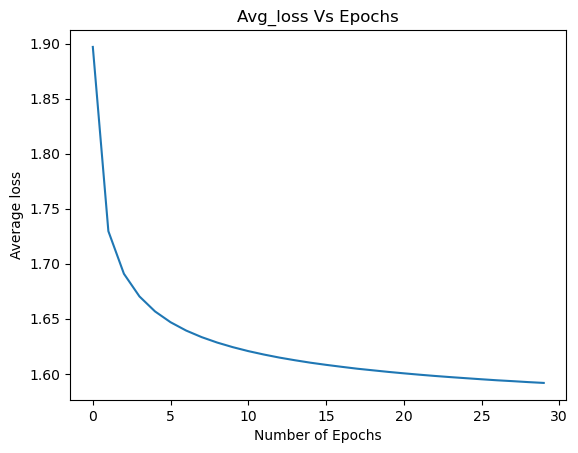

In [2]:
# 4.Loss function and optimizer
lossFn = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_model.parameters(), lr=0.01)

print("4.Loss function and optimizer")


#5.Training loop


epochs_count = 30
cost_arr = []
start = time.time()
for epochs in range(epochs_count):
    cost = 0.0
    for i, (data, labels) in enumerate(mnist_train_dataLoader):
        
        # Flatten the input images
        data = data.view(-1, data_shape)

        # Forward pass
        predicted_outputs = mnist_model(data)
        loss = lossFn(predicted_outputs, labels)
        cost = cost + loss.item()
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epochs+1}/{epochs_count}], Sample [{i+1}/{len(mnist_train_dataLoader)}], Loss: {loss.item():.4f}')

    avg_cost = cost/(len(mnist_train_dataLoader))
    print(f'Epoch [{epochs+1}/{epochs_count}], Avg_cost: {avg_cost:.4f}')
    cost_arr.append(avg_cost)
end = time.time()
training_time = end - start
print(f'training time for all epochs: {training_time}')

print(cost_arr)

plt.title('Avg_loss Vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average loss')

plt.plot(cost_arr)
print("5.Training loop")

#6.Evaluation

mnist_model.eval()

with torch.no_grad():
    correct, total = 0, 0
    #count = 0
    for data, labels in mnist_test_dataLoader:
        data = data.view(-1, data_shape)
        outputs = mnist_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        #count = count+1
        #print((predicted == labels).sum())
    #print(count)
accuracy = 100 * correct / total
print(f'Accuracy on MNIST test set: {accuracy:.2f}%')

Epoch [1/10], Sample [100/938], Loss: 1.6130
Epoch [1/10], Sample [200/938], Loss: 1.6516
Epoch [1/10], Sample [300/938], Loss: 1.6335
Epoch [1/10], Sample [400/938], Loss: 1.6258
Epoch [1/10], Sample [500/938], Loss: 1.6845
Epoch [1/10], Sample [600/938], Loss: 1.6212
Epoch [1/10], Sample [700/938], Loss: 1.6012
Epoch [1/10], Sample [800/938], Loss: 1.6650
Epoch [1/10], Sample [900/938], Loss: 1.6795
Epoch [1/10], Avg_cost: 1.6455
Epoch [2/10], Sample [100/938], Loss: 1.6443
Epoch [2/10], Sample [200/938], Loss: 1.5936
Epoch [2/10], Sample [300/938], Loss: 1.6433
Epoch [2/10], Sample [400/938], Loss: 1.6393
Epoch [2/10], Sample [500/938], Loss: 1.6106
Epoch [2/10], Sample [600/938], Loss: 1.6422
Epoch [2/10], Sample [700/938], Loss: 1.5947
Epoch [2/10], Sample [800/938], Loss: 1.6408
Epoch [2/10], Sample [900/938], Loss: 1.6535
Epoch [2/10], Avg_cost: 1.6381
Epoch [3/10], Sample [100/938], Loss: 1.6645
Epoch [3/10], Sample [200/938], Loss: 1.5878
Epoch [3/10], Sample [300/938], Loss: 

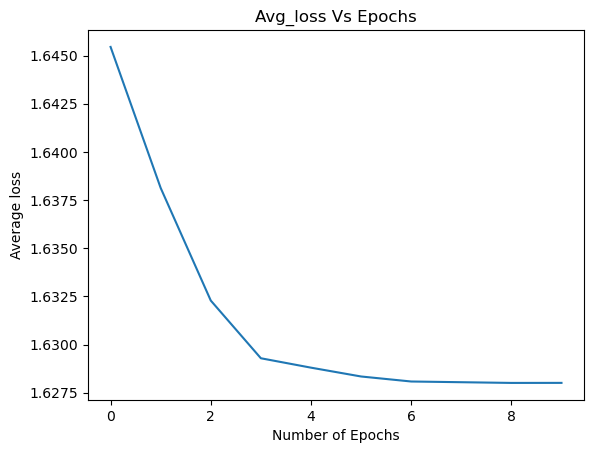

In [9]:
#Q2--------------------------------
#Hyperparameter Tuning and Regularization -------
#Hyperparameters: batch_size, learning rate lr, epochs


#1. Implement learning rate schedules: 

lossFn = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_model.parameters(), lr=0.01)

scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

epochs_count = 10
cost_arr = []

for epochs in range(epochs_count):
    cost = 0.0
    for i, (data, labels) in enumerate(mnist_train_dataLoader):
        # Flatten the input images
        data = data.view(-1, data_shape)

        # Forward pass
        predicted_outputs = mnist_model(data)
        loss = lossFn(predicted_outputs, labels)
        cost = cost + loss.item()
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epochs+1}/{epochs_count}], Sample [{i+1}/{len(mnist_train_dataLoader)}], Loss: {loss.item():.4f}')
    scheduler.step()
    avg_cost = cost/(len(mnist_train_dataLoader))
    print(f'Epoch [{epochs+1}/{epochs_count}], Avg_cost: {avg_cost:.4f}')
    cost_arr.append(avg_cost)
         

print(cost_arr)

plt.title('Avg_loss Vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average loss')
plt.plot(cost_arr)



mnist_model.eval()

with torch.no_grad():
    correct, total = 0, 0
    #count = 0
    for data, labels in mnist_test_dataLoader:
        data = data.view(-1, data_shape)
        outputs = mnist_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        #count = count+1
        #print((predicted == labels).sum())
    #print(count)
accuracy = 100 * correct / total
print(f'Accuracy on MNIST test set: {accuracy:.2f}%')


# Step size 10 epochs 30 -> 90.12 percent
# Step size 100 epochs 10 -> 89.57 percent
# Step size 10 epochs 10 -> 89.68 percent

Epoch [1/30], Sample [100/469], Loss: 1.8120
Epoch [1/30], Sample [200/469], Loss: 1.7960
Epoch [1/30], Sample [300/469], Loss: 1.7629
Epoch [1/30], Sample [400/469], Loss: 1.7306
Epoch [1/30], Avg_cost: 1.7741
Epoch [2/30], Sample [100/469], Loss: 1.7399
Epoch [2/30], Sample [200/469], Loss: 1.7114
Epoch [2/30], Sample [300/469], Loss: 1.7355
Epoch [2/30], Sample [400/469], Loss: 1.7190
Epoch [2/30], Avg_cost: 1.7293
Epoch [3/30], Sample [100/469], Loss: 1.7184
Epoch [3/30], Sample [200/469], Loss: 1.7001
Epoch [3/30], Sample [300/469], Loss: 1.6707
Epoch [3/30], Sample [400/469], Loss: 1.6547
Epoch [3/30], Avg_cost: 1.7051
Epoch [4/30], Sample [100/469], Loss: 1.6508
Epoch [4/30], Sample [200/469], Loss: 1.7077
Epoch [4/30], Sample [300/469], Loss: 1.6961
Epoch [4/30], Sample [400/469], Loss: 1.6963
Epoch [4/30], Avg_cost: 1.6892
Epoch [5/30], Sample [100/469], Loss: 1.6741
Epoch [5/30], Sample [200/469], Loss: 1.6865
Epoch [5/30], Sample [300/469], Loss: 1.6753
Epoch [5/30], Sample 

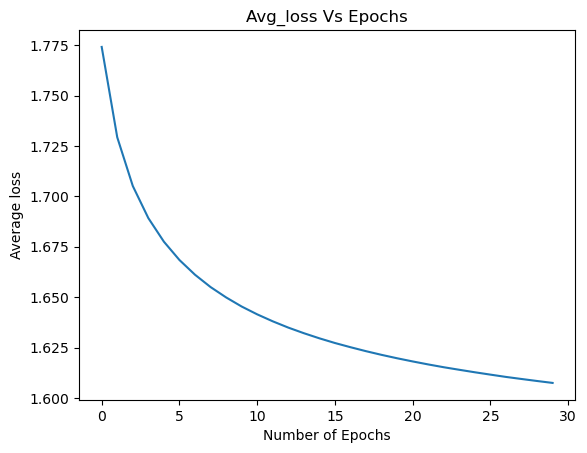

In [11]:
#Q2---
#2.Introduce L2 regularization:

lossFn = nn.CrossEntropyLoss()
reg_strength = 0.000001
optimizer = optim.SGD(mnist_model.parameters(), lr=0.01, weight_decay=reg_strength)


epochs_count = 30
cost_arr = []

for epochs in range(epochs_count):
    cost = 0.0
    for i, (data, labels) in enumerate(mnist_train_dataLoader):
        # Flatten the input images
        data = data.view(-1, data_shape)

        # Forward pass
        predicted_outputs = mnist_model(data)
        loss = lossFn(predicted_outputs, labels)
        
        cost = cost + loss.item()
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        if (i+1) % 100 == 0:
            print(f'Epoch [{epochs+1}/{epochs_count}], Sample [{i+1}/{len(mnist_train_dataLoader)}], Loss: {loss.item():.4f}')
    avg_cost = cost/(len(mnist_train_dataLoader))
    print(f'Epoch [{epochs+1}/{epochs_count}], Avg_cost: {avg_cost:.4f}')
    cost_arr.append(avg_cost)
       
print(cost_arr)

plt.title('Avg_loss Vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average loss')
plt.plot(cost_arr)

# Evaluation
mnist_model.eval()

with torch.no_grad():
    correct, total = 0, 0
    #count = 0
    for data, labels in mnist_test_dataLoader:
        data = data.view(-1, data_shape)
        outputs = mnist_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        #count = count+1
        #print((predicted == labels).sum())
    #print(count)
accuracy = 100 * correct / total
print(f'Accuracy on MNIST test set: {accuracy:.2f}%')

#0.0001 ->91.44 percent
#0.001 -> 
#0.1 -> 85.05 percent

Batch Size 32, Epoch [1/15], Training Time: 11.547256708145142 Average cost: 1.8131
[1.813115965716044]
Batch Size 32, Epoch [2/15], Training Time: 23.060720205307007 Average cost: 1.6815
[1.813115965716044, 1.6814529896418253]
Batch Size 32, Epoch [3/15], Training Time: 34.4418511390686 Average cost: 1.6524
[1.813115965716044, 1.6814529896418253, 1.652355669403076]
Batch Size 32, Epoch [4/15], Training Time: 46.739009380340576 Average cost: 1.6368
[1.813115965716044, 1.6814529896418253, 1.652355669403076, 1.6368147660573324]
Batch Size 32, Epoch [5/15], Training Time: 58.58626127243042 Average cost: 1.6267
[1.813115965716044, 1.6814529896418253, 1.652355669403076, 1.6368147660573324, 1.6266969428380331]
Batch Size 32, Epoch [6/15], Training Time: 69.99780917167664 Average cost: 1.6194
[1.813115965716044, 1.6814529896418253, 1.652355669403076, 1.6368147660573324, 1.6266969428380331, 1.6193971430460612]
Batch Size 32, Epoch [7/15], Training Time: 81.35394191741943 Average cost: 1.6139
[

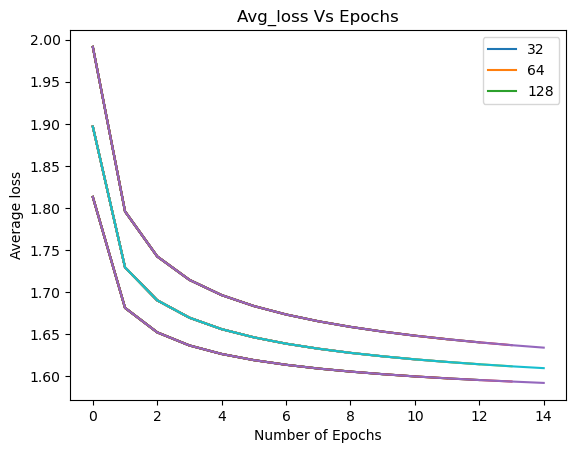

In [18]:
#Q2---------
#3.Experiment with batch sizes:


batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    mnist_train_dataLoader = DataLoader(mnist_train_dataset, batch_size = batch_size, shuffle = True )
    mnist_model = LinearClassifier(data_shape, label_shape)
    lossFn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mnist_model.parameters(), lr=0.01)
    
    epochs_count = 15
    cost_arr = []
    start = time.time()
    for epochs in range(epochs_count):
        cost = 0.0
        for i, (data, labels) in enumerate(mnist_train_dataLoader):
            # Flatten the input images
            data = data.view(-1, data_shape)

            # Forward pass
            predicted_outputs = mnist_model(data)
            loss = lossFn(predicted_outputs, labels)
            cost = cost + loss.item()
            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            end = time.time()
            training_time = end - start
            #if (i+1) % 100 == 0:
                #print(f'Epoch [{epochs+1}/{epochs_count}], Step [{i+1}/{len(mnist_train_dataLoader)}], Loss: {loss.item():.4f}')
        
        avg_cost = cost/(len(mnist_train_dataLoader))
        cost_arr.append(avg_cost)
        print(f'Batch Size {batch_size}, Epoch [{epochs+1}/{epochs_count}], Training Time: {training_time} Average cost: {avg_cost:.4f}')
        print(cost_arr)
        plt.title('Avg_loss Vs Epochs')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Average loss')
        plt.plot(cost_arr)
        plt.legend(["32", "64", "128"])
        

    #Evaluate
    mnist_model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        #count = 0
        for data, labels in mnist_test_dataLoader:
            data = data.view(-1, data_shape)
            outputs = mnist_model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)

            correct += (predicted == labels).sum().item()
            #count = count+1
            #print((predicted == labels).sum())
        #print(count)
    accuracy = 100 * correct / total
    print(f'Accuracy on MNIST test set for batch size {batch_size}: {accuracy:.2f}%')
    
    

optimizer : SGD
optimizer : SGD, Epoch [1/15], Average cost: 1.6061659972508748
optimizer : SGD, Epoch [2/15], Average cost: 1.5724641431172688
optimizer : SGD, Epoch [3/15], Average cost: 1.565942085838318
optimizer : SGD, Epoch [4/15], Average cost: 1.5622182306289674
optimizer : SGD, Epoch [5/15], Average cost: 1.559630467414856
optimizer : SGD, Epoch [6/15], Average cost: 1.5576375937143963
optimizer : SGD, Epoch [7/15], Average cost: 1.556001712481181
optimizer : SGD, Epoch [8/15], Average cost: 1.554459036954244
optimizer : SGD, Epoch [9/15], Average cost: 1.5532500562667846
optimizer : SGD, Epoch [10/15], Average cost: 1.5524208962758381
optimizer : SGD, Epoch [11/15], Average cost: 1.5516797658920287
optimizer : SGD, Epoch [12/15], Average cost: 1.5506629408518473
optimizer : SGD, Epoch [13/15], Average cost: 1.5499696796417237
optimizer : SGD, Epoch [14/15], Average cost: 1.5492083943684896
optimizer : SGD, Epoch [15/15], Average cost: 1.548602180926005
optimizer : SGD, Total 

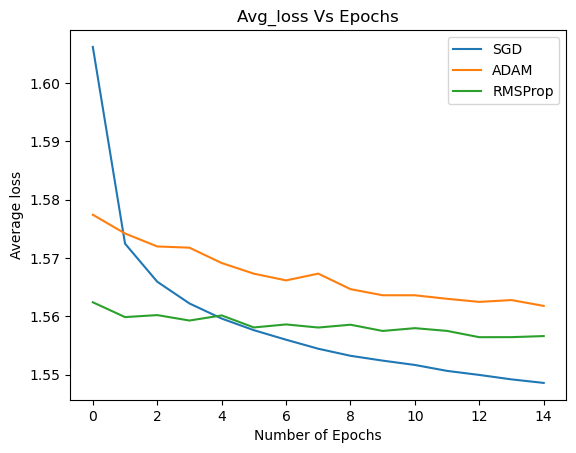

In [15]:
#Q2------------
#4.Compare different optimizers:
mnist_model = LinearClassifier(data_shape, label_shape)
lossFn = nn.CrossEntropyLoss()

optimizers = {
    'SGD': optim.SGD(mnist_model.parameters(), lr=0.05, momentum = 0.90),
    'Adam': optim.Adam(mnist_model.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(mnist_model.parameters(), lr=0.01),
}

for optimizer_name, opt in optimizers.items():
    print(f'optimizer : {optimizer_name}')
    #mnist_model = LinearClassifier(data_shape, label_shape)
    #lossFn = nn.CrossEntropyLoss()
    optimizer = opt
    
    epochs_count = 15
    cost_arr = []
    start = time.time()
    for epochs in range(epochs_count):
        loss_arr = []
        cost = 0.0
        for i, (data, labels) in enumerate(mnist_train_dataLoader):
            # Flatten the input images
            data = data.view(-1, data_shape)

            # Forward pass
            predicted_outputs = mnist_model(data)
            loss = lossFn(predicted_outputs, labels)
            loss_arr.append(loss.item())
            cost = cost + loss.item()
            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        avg_cost = cost/(len(mnist_train_dataLoader))
        cost_arr.append(avg_cost)
        print(f'optimizer : {optimizer_name}, Epoch [{epochs+1}/{epochs_count}], Average cost: {avg_cost}')
    end = time.time()
    training_time = end - start
    print(f'optimizer : {optimizer_name}, Total Training Time: {training_time} ')
    
    print(cost_arr)
    plt.title('Avg_loss Vs Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Average loss')
    plt.plot(cost_arr)
    plt.legend(["SGD", "ADAM", "RMSProp"])
    
    #Evaluate
    mnist_model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data, labels in mnist_test_dataLoader:
            data = data.view(-1, data_shape)
            outputs = mnist_model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)

            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy for optimizer {optimizer_name}: {accuracy:.2f}%')